## Medial Axis


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid
from skimage.morphology import medial_axis
from skimage.util import invert
from planning import a_star
%matplotlib inline 

In [13]:
plt.rcParams['figure.figsize'] = 12, 12

In [14]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ..., 
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


Starting and goal positions in *(north, east)*.

In [15]:
start_ne = (25,  100)
goal_ne = (650, 500)

In [16]:
# Static drone altitude (meters)
drone_altitude = 5
safety_distance = 2

In [17]:
grid = create_grid(data, drone_altitude, safety_distance)
skeleton = medial_axis(invert(grid))


Plot the edges on top of the grid along with start and goal locations.

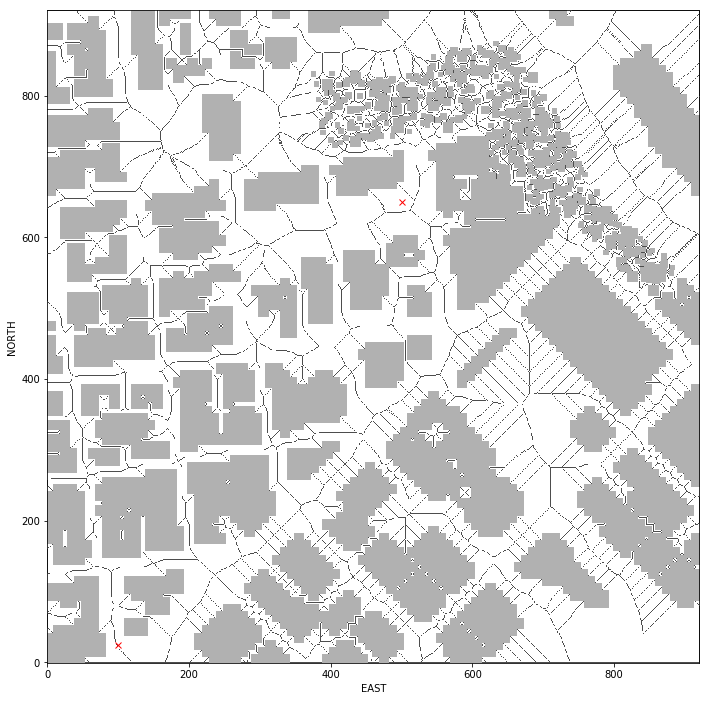

In [18]:
# equivalent to
# plt.imshow(np.flip(grid, 0))

plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
    
plt.plot(start_ne[1], start_ne[0], 'rx')
plt.plot(goal_ne[1], goal_ne[0], 'rx')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

In [19]:
# TODO: Your start and goal location defined above
# will not necessarily be on the skeleton so you
# must first identify the nearest cell on the 
# skeleton to start and goal

def find_start_goal(skel, start, goal):
    # TODO: find start and goal on skeleton
    # Some useful functions might be:
        # np.nonzero()
        # np.transpose()
        # np.linalg.norm()
        # np.argmin()
    x_skel, y_skel = np.nonzero(skel)
    skel_new = np.transpose([x_skel - start[0], y_skel - start[1]])
    norm_skel = [np.linalg.norm(s) for s in skel_new]
    i = np.argmin(norm_skel)
    near_start = (x_skel[i], y_skel[i])

    skel_new = np.transpose([x_skel - goal[0], y_skel - goal[1]])
    norm_skel = [np.linalg.norm(s) for s in skel_new]
    i = np.argmin(norm_skel)
    near_goal = (x_skel[i], y_skel[i])
    return near_start, near_goal

skel_start, skel_goal = find_start_goal(skeleton, start_ne, goal_ne)

print(start_ne, goal_ne)
print(skel_start, skel_goal)


(25, 100) (650, 500)
(24, 99) (636, 501)


In [21]:
def heuristic_func(position, goal_position):
    return np.abs(position[0] - goal_position[0]) + np.abs(position[1] - goal_position[1])

### TODO: Run A* on the skeleton
see [planning.py](/edit/planning.py) for a reminder on how to run the imported A* implementation (or rewrite it!)

In [24]:
# Compare to regular A* on the grid
#path2, cost2 = a_star(grid, heuristic_func, start_ne, goal_ne)
path, cost = a_star(skeleton, heuristic_func, skel_start, skel_goal)

**********************
Failed to find a path!
**********************


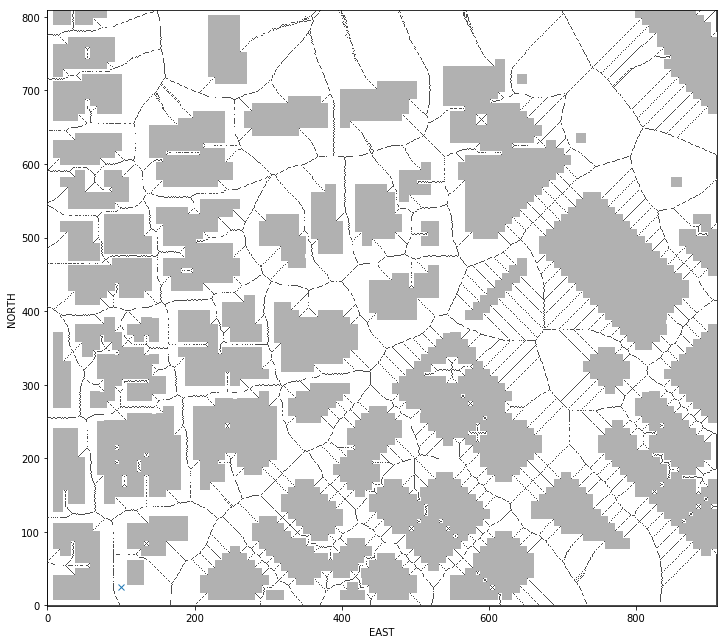

In [11]:
plt.imshow(grid, cmap='Greys', origin='lower')
plt.imshow(skeleton, cmap='Greys', origin='lower', alpha=0.7)
# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'x')
# Uncomment the following as needed
#plt.plot(goal_ne[1], goal_ne[0], 'x')

#pp = np.array(path)
#plt.plot(pp[:, 1], pp[:, 0], 'g')
#pp2 = np.array(path2)
#plt.plot(pp2[:, 1], pp2[:, 0], 'r')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

[solution](/notebooks/Medial-Axis-Solution.ipynb)